# Navigation

---

In this notebook, we implement the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload

%autoreload 2

In [1]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from agent import Agent
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 4. Project Solution

The solution uses a Deep Q-learning agent implemented in agent.py. 

We support two network architectures 
* vanilla Nueral Net 
* Dueling architecture head that estimates advantage


We compare 3 algorithms
* Deep Q-Learning
* Double Deep Q-learning
* Double Deep Q-learning with Dueling architecture


In [5]:
def dqn_run(eps_start=1.0, eps_end=0.01, eps_decay=0.995, n_episodes=1000, max_t=1000,
            lrate=1e-4, batch_size=128, double_dqn=False, dueling=False):
    
    
    agent = Agent(state_size=37, action_size=4, seed=0, 
                      lrate=lrate, batch_size=batch_size, double_dqn=double_dqn, dueling=dueling)

    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]

    scores = []                        
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):

            action = agent.act(state, eps)

            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]

            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward   
            if done:
                env.reset()
                break    

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    return agent, scores

### Deep Q-Learning

In [10]:
agent_dqn, scores_dqn = dqn_run()
torch.save(agent_dqn.dqn_local.state_dict(), 'agent_dqn_weights.pth')

Episode 100	Average Score: 0.62
Episode 200	Average Score: 4.10
Episode 300	Average Score: 7.61
Episode 400	Average Score: 10.05
Episode 500	Average Score: 12.26
Episode 600	Average Score: 14.19
Episode 700	Average Score: 15.24
Episode 800	Average Score: 14.70
Episode 900	Average Score: 15.11
Episode 1000	Average Score: 15.72


### Double Deep Q-Learning

In [7]:
agent_double_dqn, scores_double_dqn = dqn_run(double_dqn=True)

Episode 100	Average Score: 0.48
Episode 200	Average Score: 2.65
Episode 300	Average Score: 7.00
Episode 400	Average Score: 10.43
Episode 500	Average Score: 12.55
Episode 600	Average Score: 14.60
Episode 700	Average Score: 14.65
Episode 800	Average Score: 15.14
Episode 900	Average Score: 15.47
Episode 1000	Average Score: 16.16


### Dueling Double DQN

In [6]:
agent_dueling_ddqn, scores_dueling_ddqn = dqn_run(double_dqn=True, dueling=True)

Episode 100	Average Score: 0.83
Episode 200	Average Score: 3.31
Episode 300	Average Score: 7.55
Episode 400	Average Score: 10.01
Episode 500	Average Score: 12.58
Episode 600	Average Score: 13.74
Episode 700	Average Score: 14.57
Episode 800	Average Score: 15.35
Episode 900	Average Score: 16.12
Episode 1000	Average Score: 16.50


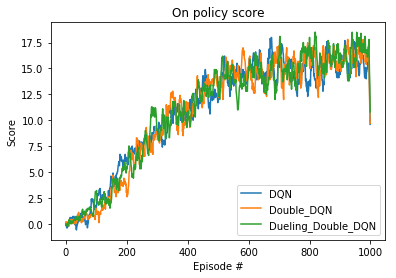

In [14]:
# plot the scores
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_dqn)), movingaverage(scores_dqn, 10), label='DQN')
plt.plot(np.arange(len(scores_double_dqn)), movingaverage(scores_double_dqn, 10), label='Double_DQN')
plt.plot(np.arange(len(scores_dueling_ddqn)), movingaverage(scores_dueling_ddqn, 10), label='Dueling_Double_DQN')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("On policy score")
plt.legend()
plt.show()

### Average reward over 100 episodes using off-policy for DQN

In [21]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
scores_offp = []                                        # initialize the score
agent_dqn.dqn_local.eval()
for i in range(100):
    score = 0
    while True:
        
        with torch.no_grad():
            _state = torch.from_numpy(state).float().unsqueeze(0).to("cpu")
            action_values = agent_dqn.dqn_local(_state)
        action = np.argmax(action_values.cpu().data.numpy())
        
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores_offp.append(score)
            env.reset()
            break
    
print("Score: {}".format( np.mean(scores_offp) ))

Score: 16.95


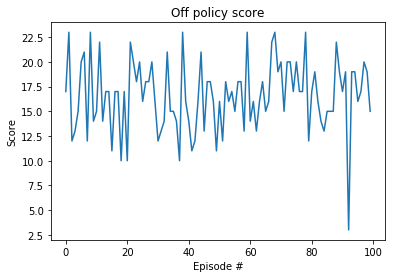

In [20]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_offp)), scores_offp)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("Off policy score")
plt.show()

In [ ]:
env.close()